In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">Predictive Marketing : K-Means clustering & PCA</p>

In this project, we will use unsupervised machine learning to categorize clients based on features of their purchase behavior. Predictive marketing may help businesses by finding clients that have similar demands or respond similarly to particular marketing activity. Furthermore, owing to our research, we can undoubtedly help business in determining the suitable categories to direct their targeted marketing campaigns.To achieve success, we will use a 5-step methodology to successfully complete this extensive research.

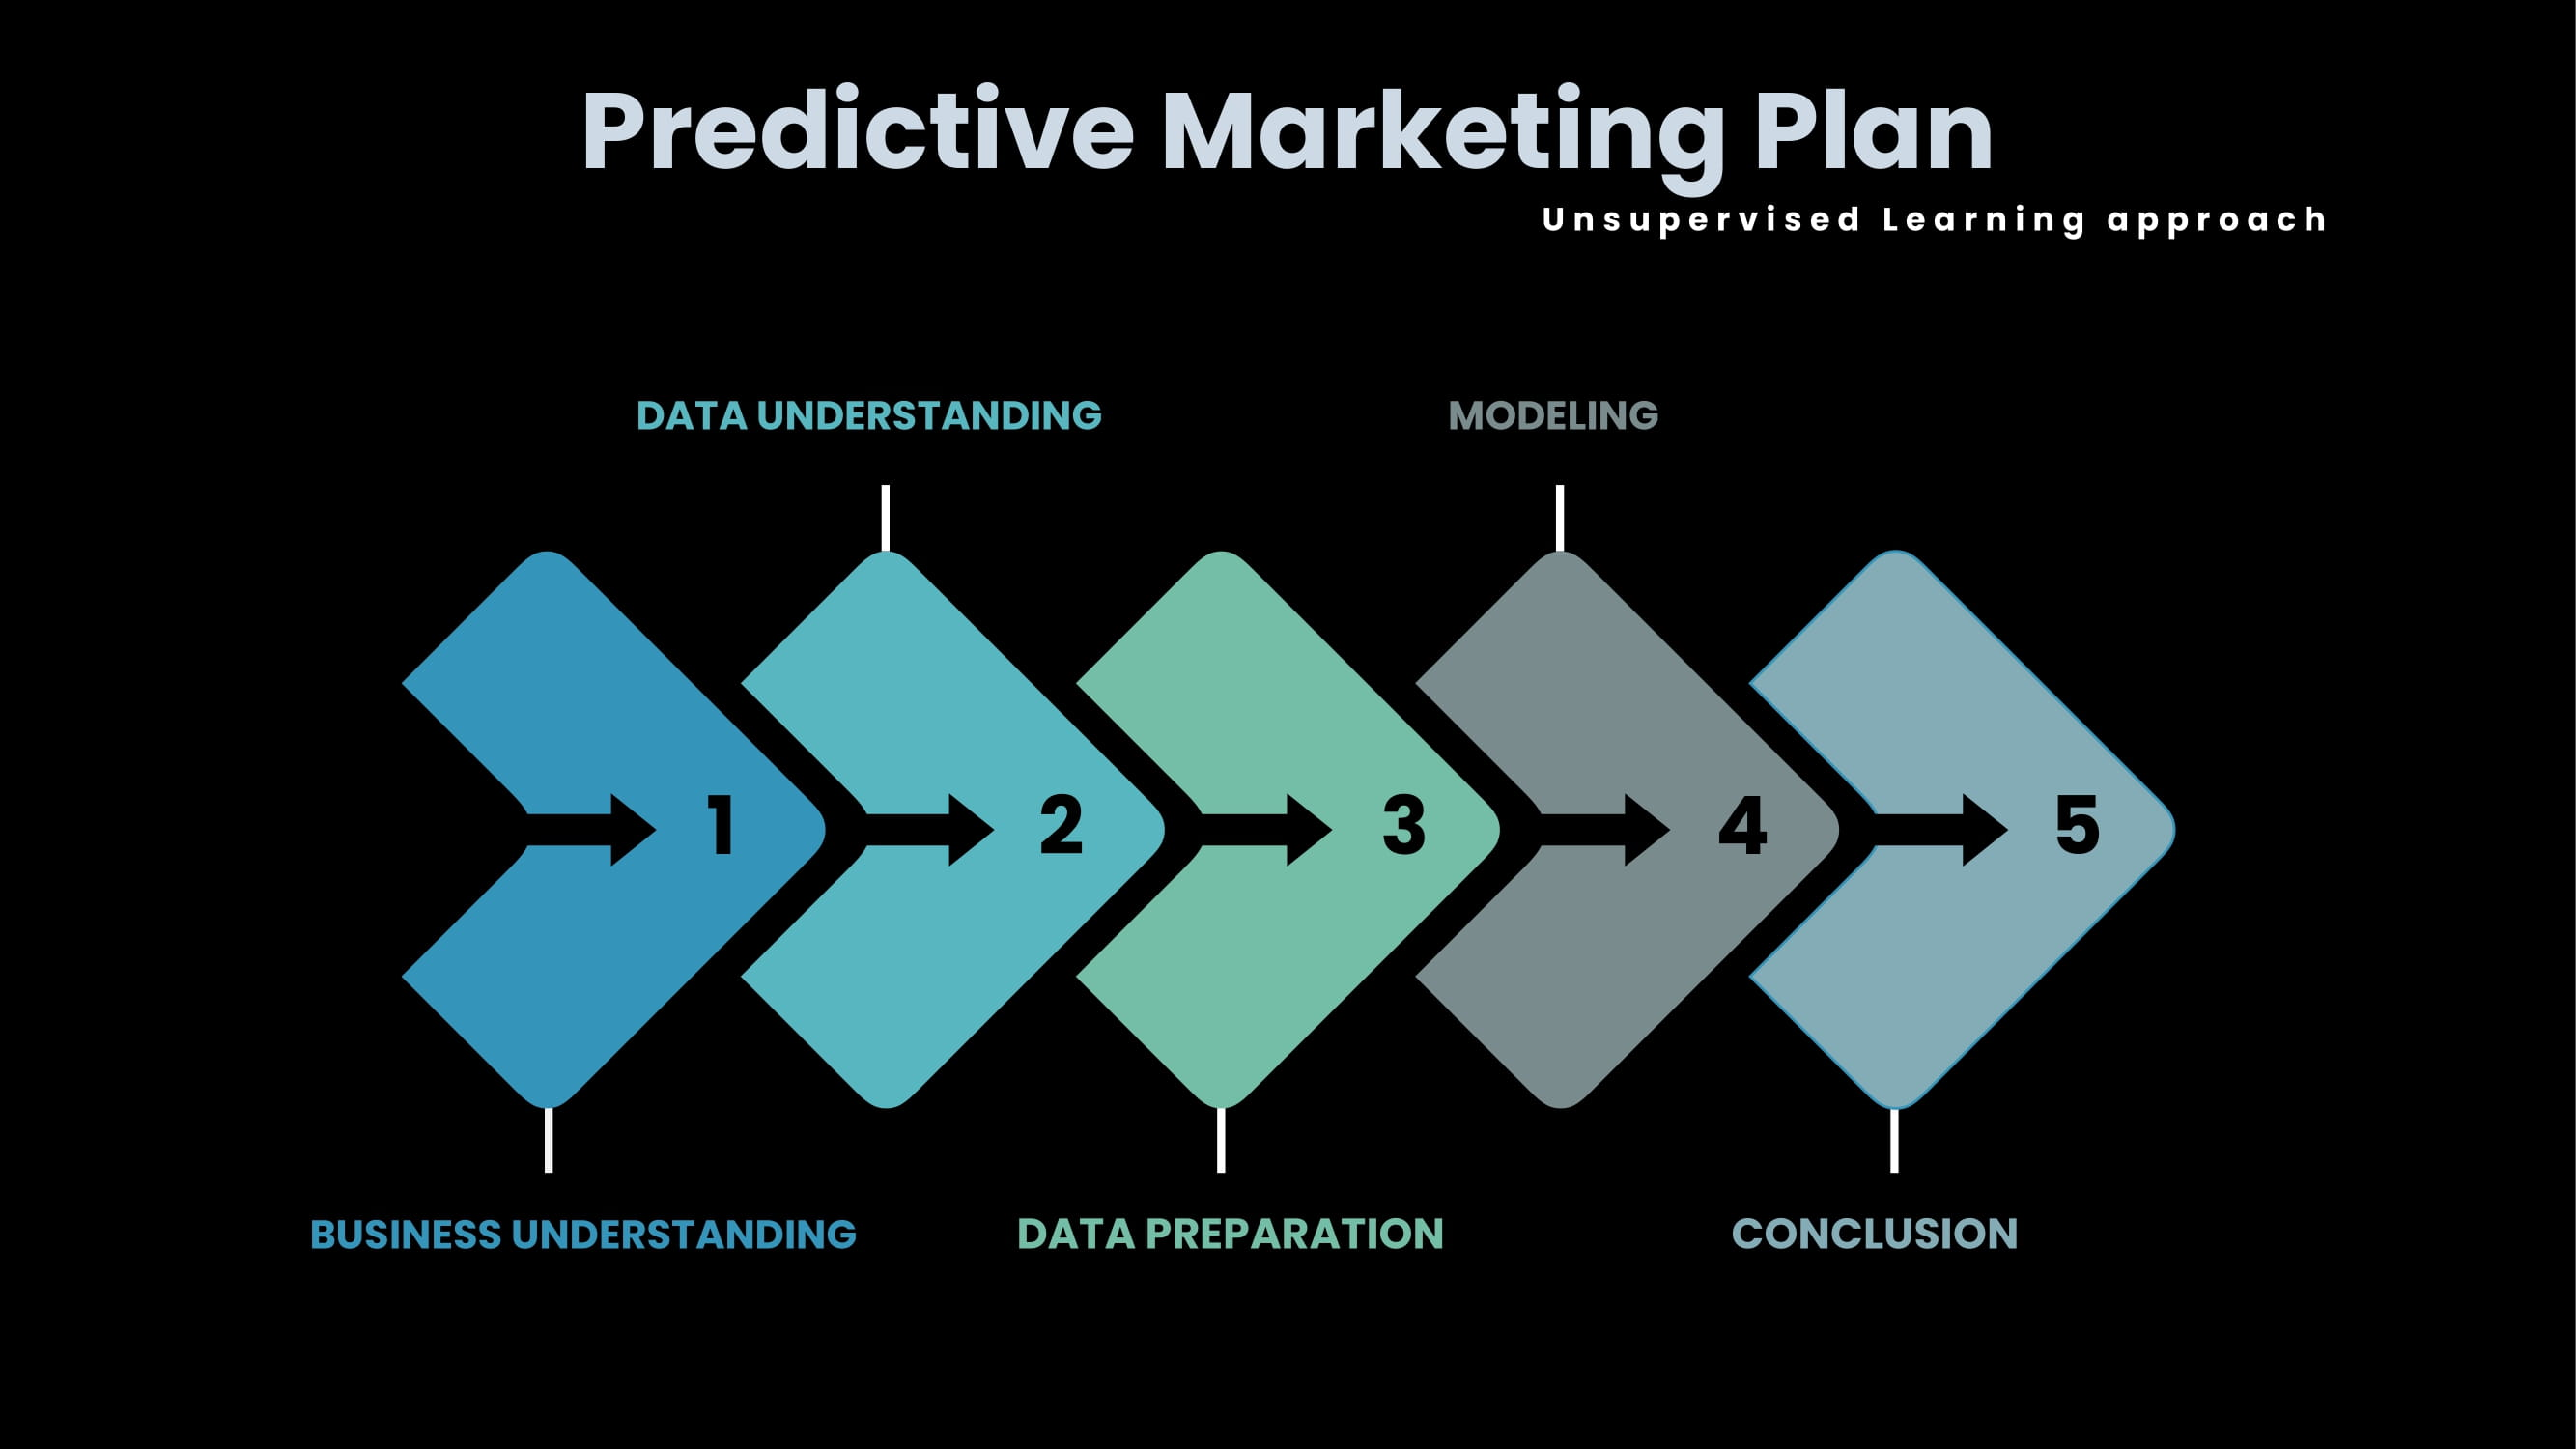

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
[1. BUSINESS UNDERSTANDING](#1)
    
[2. DATA UNDERSTANDING](#2)
    
[3. DATA PREPARATION](#3)
    
[4a. MODELING : K-MEANS](#4)
    
[4b. MODELING : PRINCIPAL COMPONENT ANALYSIS (PCA)](#5)
    
[5. CONCLUSION](#6)
    
[6. THANK YOU 😊](#7)

<a id="1"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> BUSINESS UNDERSTANDING</p>

Hunter's e-grocery is a well-known new generation lifestyle brand. That has a brand presence in ten countries and is continually seeking for new methods to better and anticipate the demands of their customers. Black swan events such as Covid-19, the Ukraine crisis, and the gas scarcity have all had an influence on the purchasing behaviour of clients. Therefore, using an unsupervised machine learning model and Principal component analysis (PCA) for dimensionality reduction, We will develop a business values proposition for predictive marketing in order to target our customers based on features of their purchasing behavior.

<a id="2"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> DATA UNDERSTANDING</p>

#### **The dataset consists of 2019501 Rows & 12 Columns which are as follows :**

- order_id – (A unique number to identity the order)
- user_id - (A unique number to identify the user)
- order_number – (Number of the order)
- order_dow – (Day of the Week the order was made)
- order_hour_of_day – (Time of the order)
- days_since_prior_order - (History of the order)
- product_id – (Id of the product)
- add_to_cart_order – (Number of items added to cart)
- reordered – (If the reorder took place)
- department_id - (Unique number allocated to each department)
- department – (Names of the departments)
- product_name – (Name of the products)


#### **We will be doing the below steps to further understand the data:**

- Importing packages
- Loading data
- Get information on the data
- Conducting summary statistics 
- Taking care of Null values
- Converting data types

In [ ]:
# IMPORTING PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans , k_means
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# LOADING DATA
main_data = pd.read_csv("/kaggle/input/ecommerce-dataset-for-predictive-marketing-2023/ECommerce_consumer behaviour.csv")
df = main_data.copy()
df

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

### Note:

**From the above summary statistics we could see that we have null value in “ days_since_prior_order” which is 6.8 % of the entire data set. The following are the steps we will do to further continue on the explanatory analysis in sequential order.**

In [ ]:
df['days_since_prior_order'].unique()

In [ ]:
# TAKING CARE OF NULL VALUES
for col in df.columns:
    if df[col].dtypes == 'float64':
        df[col].fillna(-1,inplace=True) 

In [ ]:
df.isnull().sum()

In [ ]:
# CONVERTING DATA TYPES
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)

In [ ]:
df.info()

<a id="3"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> DATA PREPARATION</p>

#### **In this section we will be doing the following steps:**

- Investigating all elements within each feature
- Aggregating & grouping values to visualize purchasing behaviour
- Aggregating & grouping values to understand purchasing behaviour
- Aggregating & grouping values to visualize & identify the most reordered items
- Aggregating & grouping values to understand product reordered ratio
- Aggregating & grouping values to visualize reordered ratio


In [ ]:
# INVESTIGATING ALL ELEMENTS WITHIN EACH FEATURE
for colum in df:
    unique_values = np.unique(df[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

In [ ]:
df.columns

In [ ]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE PURCHASING BEHAVIOUR
grouped = df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('dark')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
sns.color_palette("husl", 10)

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Number of products added to cart', fontsize=13)
plt.show()

### Note:
**From the above plot we can understand the purchasing behavior of the customers, where we could observe that customers are usually ordering on average around 4-7 products.**

In [ ]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PURCHASING BEHAVIOUR
grouped = df.groupby(["product_id","product_name","department"])["reordered"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='reordered', ascending=False)[:15].reset_index()
grouped

### Note:
**From the above table we can clearly observe that produce, dairy products, beverages and snacks are the top categories the 
customers are most interested to purchase**

In [ ]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE & IDENTIFY THE MOST REORDERED ITEMS
grouped  = grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

### Note:
**From the above analysis we could observe that "Fresh Fruits","Fresh Vegetables","Packaged Vegetables Fruits","Yogurt" & "Packaged Cheese" are top 5 most reordered products.**

In [ ]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PRODUCT REORDERED RATIO
grouped = df.groupby("reordered")["product_id"].aggregate('count').reset_index()
grouped['Ratio'] = grouped["product_id"].apply(lambda x: x /grouped['product_id'].sum())
grouped

In [ ]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE REORDERED RATIO
grouped  = grouped.groupby(['reordered']).sum()['product_id'].sort_values(ascending=False)

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 8))
sns.barplot(grouped.index, grouped.values, palette='coolwarm')
plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Note:
**From the above we can see that 59 % of products were reordered by customers.**

<a id="4"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> MODELING : K-MEANS</p>

#### **In this section we will be first building a K-Means clustering followed by PCA:**

#### K-Means Clustering:

K-means clustering is an unsupervised learning algorithm that divides a dataset into k clusters, where k is the number of clusters specified by the researcher. The goal of the algorithm is to minimize the sum of squared distances between the points in a cluster and the centroid of the cluster.

Here is an example of how K-means clustering might work:

Suppose we have a dataset with two features (x and y) and we want to use K-means to divide the data into two clusters. We start by randomly initializing two points (centroids) in the data. We then assign each data point to the cluster corresponding to the nearest centroid. Once all of the points have been assigned to a cluster, we compute the new centroids for each cluster by taking the mean of all of the points in the cluster. We then re-assign each data point to the cluster corresponding to the nearest centroid. This process is repeated until the centroids stop moving or the assignment of points to clusters stops changing. 

**Therefore, the following are the methodological steps we will be taking to build our model:** 

- First step we will be training & experimenting K-means with 6 clusters (testing version)
- Second step we will try to run the K-means on a rang of 2 -10 clusters (to find optimal number of cluster)
- Creat Scree plot to visualize the inertia using Elbow method (for visualization)
- Re-running K-means with 5 cluster


In [ ]:
len(df.product_id.unique())

In [ ]:
# UNDERSTANDING DATA DISTRIBUTION BY USING CROSSTAB TO GET ROW WISE PROPORTION FOR EARCH DEPARTMENT
clst_prd = pd.crosstab(df['user_id'], df['department'])
clst_prd

In [ ]:
# RUNNING K-MEANS
X_train = clst_prd.values

# WE WILL START WITH 6 CLUSTERS FOR EXPLORATION
kmeans = KMeans(n_clusters=6, random_state=540)
kmeans = kmeans.fit(X_train)

# PRINT THE CLUSTERS THAT IS ASSIGNED FOR EACH OBSERVATION
print("The cluster are  :", kmeans.labels_)

# PRINT INERTIA
print("The Inertia is :", kmeans.inertia_)

In [ ]:
# RUNNING K-MEANS ON A RANG OF CLUSTERS TO FIND OPTIMAL NUMBER
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

In [ ]:
# CREATING SCREE PLOT TO VISUALIZE INERTIA - ELBOW METHOD
fig, (ax1) = plt.subplots(1, figsize =(20,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

### Note:
**From the above plot we can come to an understanding that the inertia score start to drop drastically between 4 - 5 number of cluster. Thefore, I have decided to choose 5 number of cluster to grain granularity on our study**

In [ ]:
# RE-RUNNNG K-MEANS ON 5 CLUSTERS
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

# PREDICTIONS FOR NEW DATA
predictions = kmeans.predict(X_train)

# CALCULATING THE COUNTS FOR THE CLUSTER
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# CREATING THE PLOT
countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

# DISPLAY THE PLOT
countscldf

In [ ]:
kmeans.labels_

In [ ]:
predictions

<a id="5"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> MODELING :PRINCIPAL COMPONENT ANALYSIS (PCA)</p>

#### PCA:

Principal component analysis (PCA) is a statistical technique that is used to analyze the patterns in data. It involves finding a set of directions, or "principal components," that capture as much of the variation in the data as possible. These principal components can be visualized as lines or planes in the data, and are typically chosen so that they are mutually orthogonal (i.e., perpendicular to one another).

One way to visualize PCA is to plot the data in a scatterplot, with the principal components as the axes. This can help to reveal patterns in the data that are not immediately apparent when looking at the raw data. For example, if the data points form a clear cluster in the scatterplot, this may indicate that there is some underlying structure to the data that can be captured by the principal components.

Another way to visualize PCA is to plot the data in a lower-dimensional space, such as a 2D or 3D plot. This can be particularly useful when dealing with high-dimensional data, as it can be difficult to visualize patterns in data with more than 3 dimensions. In this case, the principal components can be used to "project" the data onto a lower-dimensional space, allowing the patterns in the data to be more easily visualized. 

**Therefore, the following are the methodological steps we will be taking to plot PCA in 2D:** 

- Running Principal Component Analysis (PCA) to visualize & improve results for 5 clusters
- Identifying the "best" number of components
- Running PCA again with 9 components
- Finally re-running K-means with 5 clusters & PCA with 9 components


In [ ]:
# RUNNING PCA TO VISUALIZE DATA
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# PRECENTAGE OF VARIANCE EXPLAINED FOR EACH COMPONENTS
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# PLOTTING DATA POINTS
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3,4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [ ]:
# IDENTIFYING THE "BEST" NUMBER OF COMPONENTS : TRYING WITH DIMENTIONALITY REDUCTION & K-MEANS
n_components = X.shape[1]

# RUNNING PCA WITH ALL COMPONENTS
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)

# CALCULATING THE 95% VARIANCE
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# CREATING A DF WITH THE COMPONENTS & EXPLAINED VARIANCE
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# TRYING TO HIT 95% VARIANCE
print("Variance explain with 4 n_compononets: ", sum(a["Explained Variance"][0:4]))
print("Variance explain with 8 n_compononets: ", sum(a["Explained Variance"][0:8]))
print("Variance explain with 9 n_compononets: ", sum(a["Explained Variance"][0:9]))
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))
print("Variance explain with 18 n_compononets: ", sum(a["Explained Variance"][0:18]))
print("Variance explain with 21 n_compononets: ", sum(a["Explained Variance"][0:21]))

# PLOTTING DATA POINTS
plt.figure(1, figsize=(14, 10))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# PLOTTING LINE WITH 95% E.V.
plt.axvline(9,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# ADDING ARROW POINTER
plt.annotate(' 9 eigenvectors used to explain 95% variance', xy=(9, pca.explained_variance_ratio_[9]), 
             xytext=(9, pca.explained_variance_ratio_[9]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

### Note:
**From the above plot we can see that 9 eigenvectors can be used to represent 95% variance**

In [ ]:
# RUNNING PCA AGAIN WITH 9 COMPONENTS
pca = PCA(n_components=9, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

# RUNNING K-MEANS
for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# CREATING SCREE PLOT TO VISUALIZE INERTIA - ELBOW METHOD
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [ ]:
## FINAL STEP:

# RUNNING PCA WITH 9 COMPONENTS
pca = PCA(n_components=9, random_state=453)
X_r = pca.fit(X).transform(X)

# RUNNING K-MEANS WITH 5 CLUSTERS
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans= kmeans.fit(X_r)

clusters = kmeans.labels_

# ADDING THE CLUSTERS BACK TO THE ORIGINAL DATASET
clst_prd['clusters'] = clusters

# CREATING A CLUSTER CATERGORY
clst_prd["Cluster Category"] = "No Data"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==0]="Cluster 1"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==1]="Cluster 2"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==2]="Cluster 3"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==3]="Cluster 4"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==4]="Cluster 5"

clst_prd

<a id="6"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> CONCLUSION</p>


#### **BUSINESS VALUE:**


In this Research Kernel, I utilized unsupervised machine learning along with PCA to decrease the number of dimensions to 9 components and 5 clusters. These clusters could then be used to target marketing campaigns based on the company's requirements and consumer characteristics. I have also build a live dashboard below for the purpose of end-end deployment.


<img src = "https://www.linkpicture.com/q/Department-Breakdown-total-Clusters.png">

<img src = "https://www.linkpicture.com/q/Reorder-Product-Per-Cluster.png">

<img src = "https://www.linkpicture.com/q/Weekly-Order.png">

<img src = "https://www.linkpicture.com/q/Time-Analysis.png">

<img src="https://www.linkpicture.com/q/Cluster-Tree-Breakdown.png">


<a id="7"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> THANK YOU 😊</p>

### Hope you enjoyed going over my notebook

**Please upvote 🗳 share my kernel & data :[Supermarket dataset](https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023)💫**

**Feel free to post your questions in the comments and I would be happy to respond!**

**Cheers to all of you 🥂**
